# Bank Loan  Financial Analysis

####  Mohammad Areeb
    Linkedin : www.linkedin.com/in/mohammadareeb2544
    Github : https://github.com/areeb399         

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading File

In [2]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",1)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### Top 5 Values

In [3]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Bottom 5 Values

In [4]:
df.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Shape of Data

In [5]:
df.shape

(5000, 14)

### Checking Null Values

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Columns Available

In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### Dropping Unnecessary Column

In [8]:
df.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

In [9]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

### Data Types

In [10]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### Summary of Data

In [11]:
# Generate summary statistics
summary_stats = df[['Age','Experience','Income','Family','Education']].describe()
summary_stats

,Age,Experience,Income,Family,Education
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.881000
std,11.463166,11.467954,46.033729,1.147663,0.839869
min,23.000000,-3.000000,8.000000,1.000000,1.000000
25%,35.000000,10.000000,39.000000,1.000000,1.000000
50%,45.000000,20.000000,64.000000,2.000000,2.000000
75%,55.000000,30.000000,98.000000,3.000000,3.000000
max,67.000000,43.000000,224.000000,4.000000,3.000000


### Subplots of the Summary

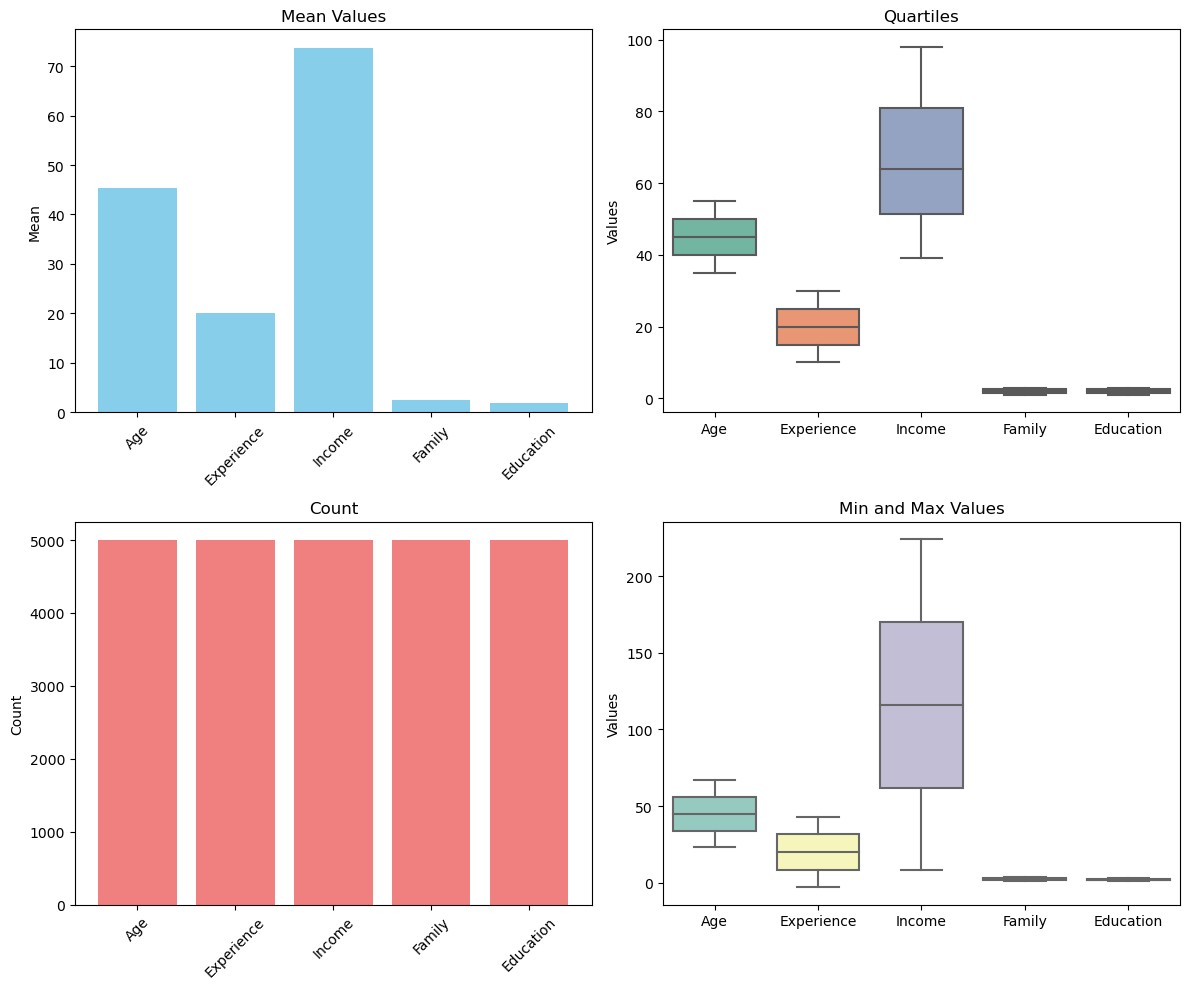

In [12]:
# Create subplots for multiple visualizations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Bar plot for mean values
axes[0, 0].bar(summary_stats.columns, summary_stats.loc['mean'], color='skyblue')
axes[0, 0].set_title('Mean Values')
axes[0, 0].set_ylabel('Mean')
axes[0, 0].tick_params(axis='x', rotation=45)

# Box plot for quartiles
sns.boxplot(data=summary_stats.loc[['25%', '50%', '75%']], ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Quartiles')
axes[0, 1].set_ylabel('Values')

# Histogram for count
axes[1, 0].bar(summary_stats.columns, summary_stats.loc['count'], color='lightcoral')
axes[1, 0].set_title('Count')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Box plot for min and max
sns.boxplot(data=summary_stats.loc[['min', 'max']], ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Min and Max Values')
axes[1, 1].set_ylabel('Values')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


### Calculating the skewness of numerical columns

In [13]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

### Creating histograms for each column

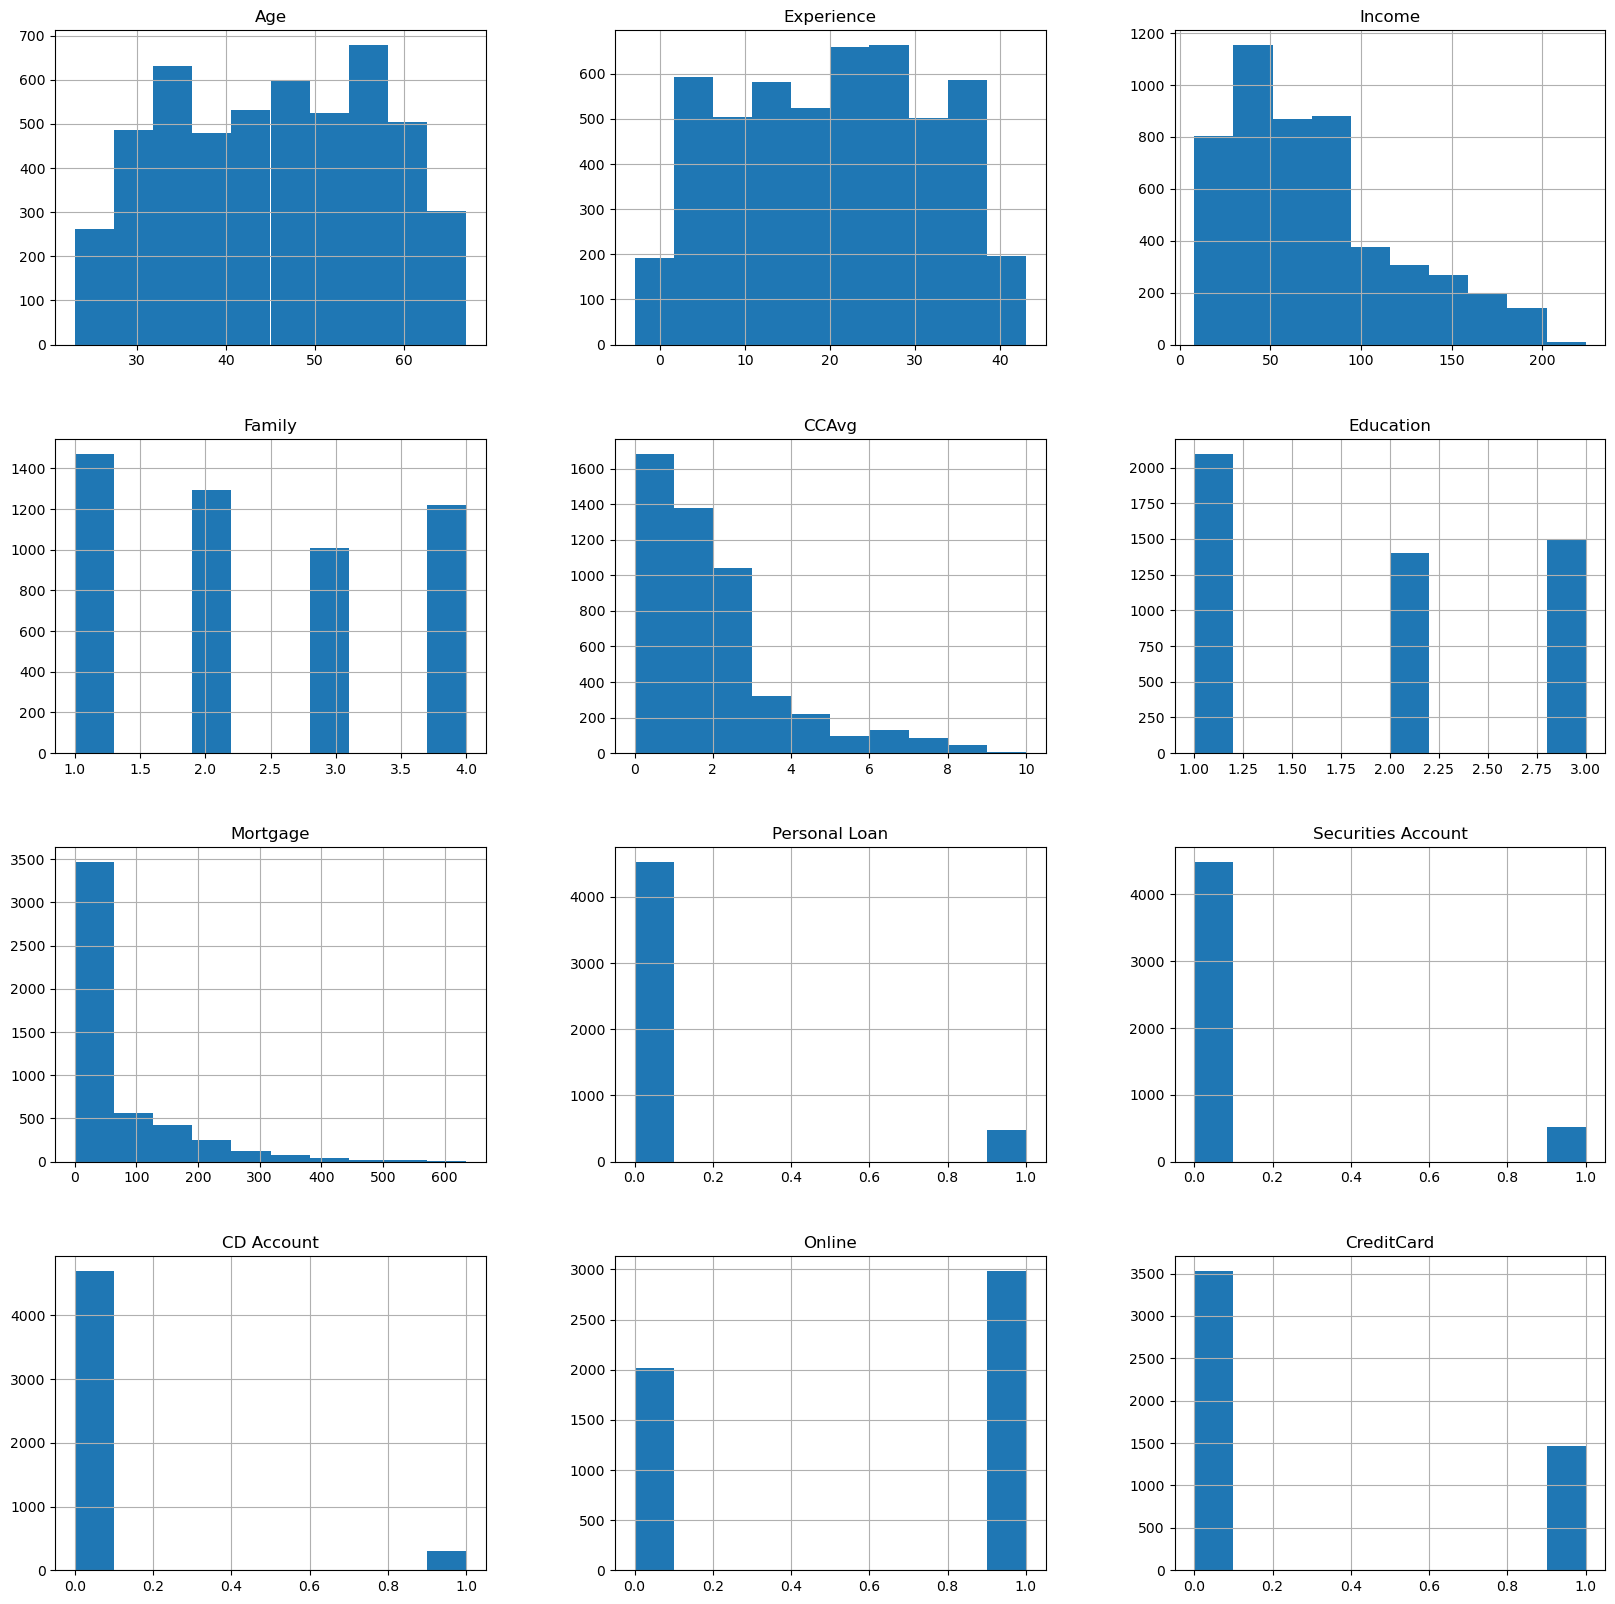

In [14]:
df.hist(figsize = (20,20))
plt.show()

### Creating a displot for 'Experience' Column

<Figure size 1600x1200 with 0 Axes>

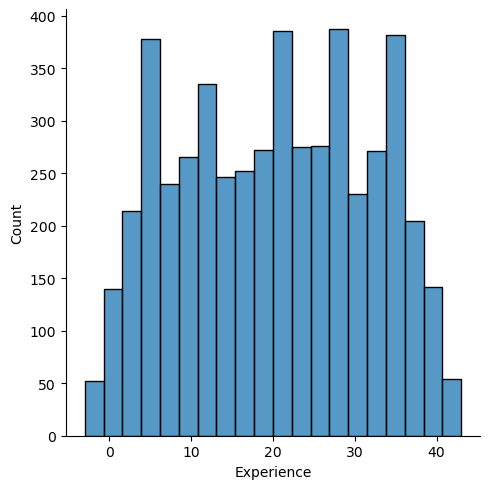

In [15]:
plt.figure(figsize = (16,12))
sns.displot(df['Experience'])
plt.show()

#### Most data available are of 20 to 30 years old exeperienced person.
#### We can say that people with 20 to 30 years of experience can take personal loan.

### Checking mean of Experience data

In [16]:
df['Experience'].mean()

20.1046

### Negative data in Experience Column

In [17]:
negative_exp = df[df['Experience']<0]
negative_exp

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.300000,3,0,0,0,0,0,1
226,24,-1,39,2,1.700000,2,0,0,0,0,0,0
315,24,-2,51,3,0.300000,3,0,0,0,0,1,0
451,28,-2,48,2,1.750000,3,89,0,0,0,1,0
524,24,-1,75,4,0.200000,1,0,0,0,0,1,0
536,25,-1,43,3,2.400000,2,176,0,0,0,1,0
540,25,-1,109,4,2.300000,3,314,0,0,0,1,0
576,25,-1,48,3,0.300000,3,0,0,0,0,0,1
583,24,-1,38,2,1.700000,2,0,0,0,0,1,0
597,24,-2,125,2,7.200000,1,0,0,1,0,0,1


In [18]:
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


### Total number of negative data

In [19]:
negative_exp.shape

(52, 12)

#### Total 52 persons having negative exeperience

### Creating a distribution plot (displot) for the 'Age' column

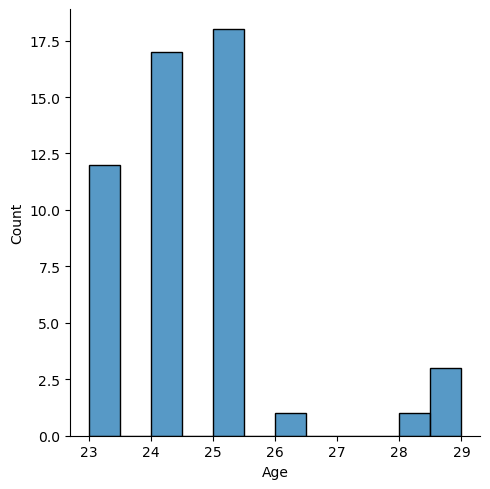

In [20]:
sns.displot(negative_exp['Age'])
plt.show()

#### Person belong to 23 to 30 years of age have negative experience

### Mean Count of negative experice data

In [22]:
negative_exp['Experience'].mean()

-1.4423076923076923

### Size of negative experience data

In [23]:
negative_exp.size

624

In [24]:
print('There are {} records which has negative values for experince, approx {} %'.format(negative_exp.size, ((negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experince, approx 1.04 %


### Creating a copy of a DataFrame df and assign it to a new variable data

In [25]:
data = df.copy()
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


### Shape of dataframe 'data'

In [59]:
data.shape

(5000, 13)

### Using NumPy function to replace values in the 'Experience' column of the DataFrame 'data' 
### with the mean of the 'Experience' 
### column where the original values are less than 0

In [27]:
data['Experience'] = np.where(data['Experience']<0 , data['Experience'].mean(), data['Experience'])

### Filter rows in the DataFrame 'data' where the 'Experience' column has negative values

In [28]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


### Calculating the correlation matrix

In [30]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048719,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.048719,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.018097,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


### Creating a heatmap of the correlation matrix using Seaborn (sns) and Matplotlib (plt)

<Axes: >

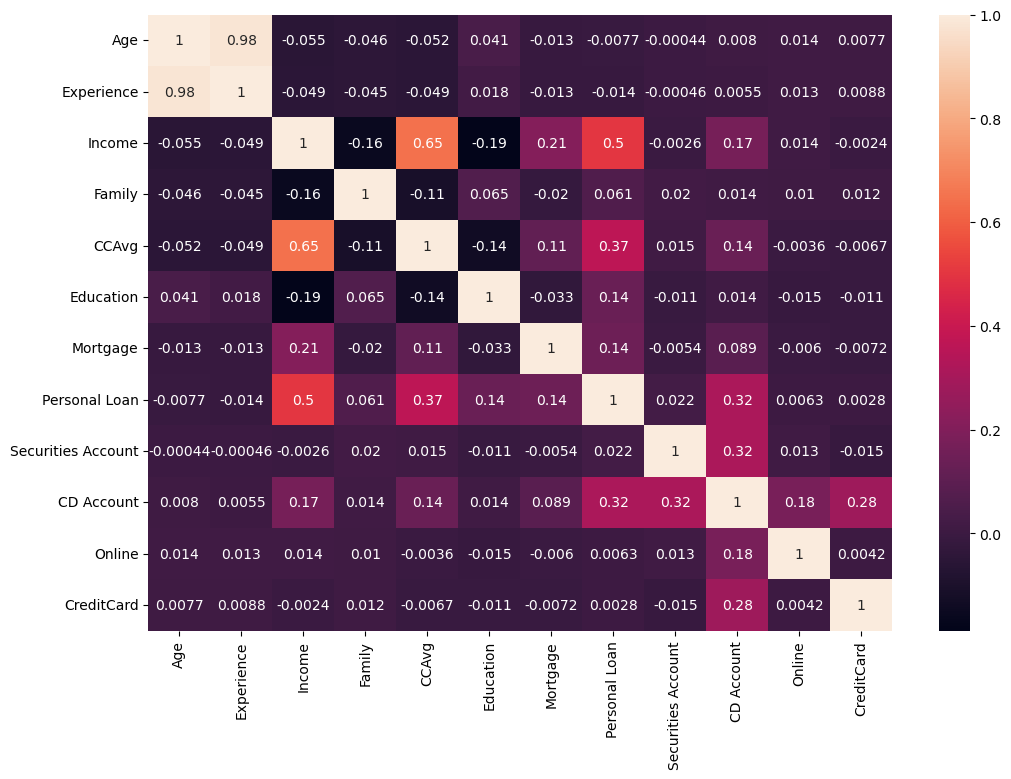

In [31]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True)

#### The correlation between experience and age is notably strong, indicating a substantial relationship between these two variables. Consequently, it may be prudent to consider removing one of these columns from the dataset to avoid potential multicollinearity issues.

### Dropping the 'Experience' column from  DataFrame 'data' using the data.drop()

In [33]:
data = data.drop(['Experience'], axis=1)
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [34]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


### Checking unique value in Education column


In [35]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

### Defining a Python function called experience(x) that takes an input x 

In [37]:
def experience(x):
    if x==1:
        return "UnderGraduate"
    if x==2:
        return "Graduate"
    else:
        return "Working Professionals"

### Apply the 'experience' function to create a new column 'EDU'

In [38]:
data['EDU'] = data['Education'].apply(experience)

In [39]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU
0,25,49,4,1.6,1,0,0,1,0,0,0,UnderGraduate
1,45,34,3,1.5,1,0,0,1,0,0,0,UnderGraduate
2,39,11,1,1.0,1,0,0,0,0,0,0,UnderGraduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


### Retrieving the unique values present in the 'EDU' column

In [40]:
data['EDU'].unique()

array(['UnderGraduate', 'Graduate', 'Working Professionals'], dtype=object)

### Grouping DataFrame 'data' by the 'EDU' column and then calculating the sum of the 'Age' column within each group

In [41]:
education_dis = data.groupby('EDU')['Age'].sum()
education_dis

EDU
Graduate                 63191
UnderGraduate            94244
Working Professionals    69257
Name: Age, dtype: int64

### Creating a pie chart to visualize the distribution of education categories based on the 'EDU' column

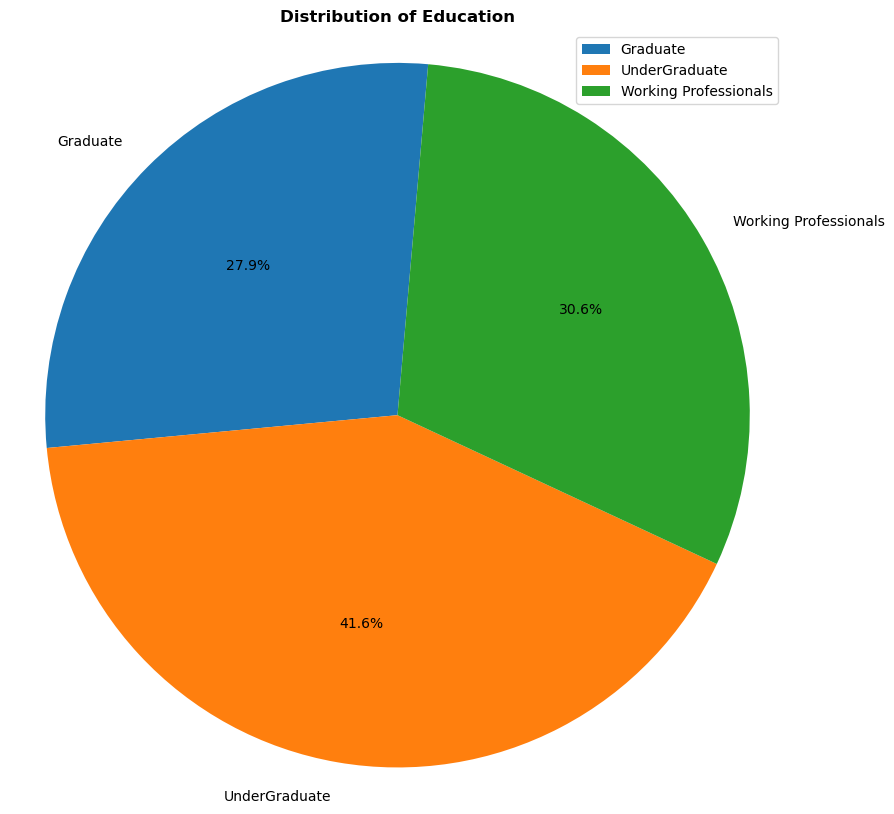

In [42]:
plt.figure(figsize = (10,10))
plt.pie(education_dis, labels = education_dis.index, autopct = '%1.1f%%', startangle = 85)
plt.axis('equal')
plt.title('Distribution of Education', fontweight = 'bold')
plt.legend(education_dis.index, loc='upper right')
plt.show()

### Retrieving the unique values present in the 'Income' column 

In [43]:
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

### Count the occurrences of unique values in the 'Securities Account' column of DataFrame 'data'

In [44]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

### Count the occurrences of unique values in the 'CD Account' column of DataFrame 'data'

In [45]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

### Defining a Python function called security(y) that takes a DataFrame y as input and categorizes individuals into different groups based on the values of the 'Securities Account' and 'CD Account' columns 

In [46]:
def security(y):
    if(y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return "Both Security and Deposit Account"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 0):
        return "No Account"
    if(y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return "Only Security Account"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return "Only Deposit Account"

### Applying the security function to DataFrame 'data' using the apply method to create a new column named 'Account_Holder_Category'

In [47]:
data['Account_Holder_Category'] = data.apply(security, axis = 1)

In [48]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU,Account_Holder_Category
0,25,49,4,1.6,1,0,0,1,0,0,0,UnderGraduate,Only Security Account
1,45,34,3,1.5,1,0,0,1,0,0,0,UnderGraduate,Only Security Account
2,39,11,1,1.0,1,0,0,0,0,0,0,UnderGraduate,No Account
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,No Account
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,No Account


### Count the occurrences of unique values in the 'Account_Holder_Category' column

In [49]:
account_values = data['Account_Holder_Category'].value_counts()
account_values

No Account                           4323
Only Security Account                 375
Only Deposit Account                  155
Both Security and Deposit Account     147
Name: Account_Holder_Category, dtype: int64

### Creating a pie chart to visualize the distribution of account holder categories based on the 'Account_Holder_Category' column

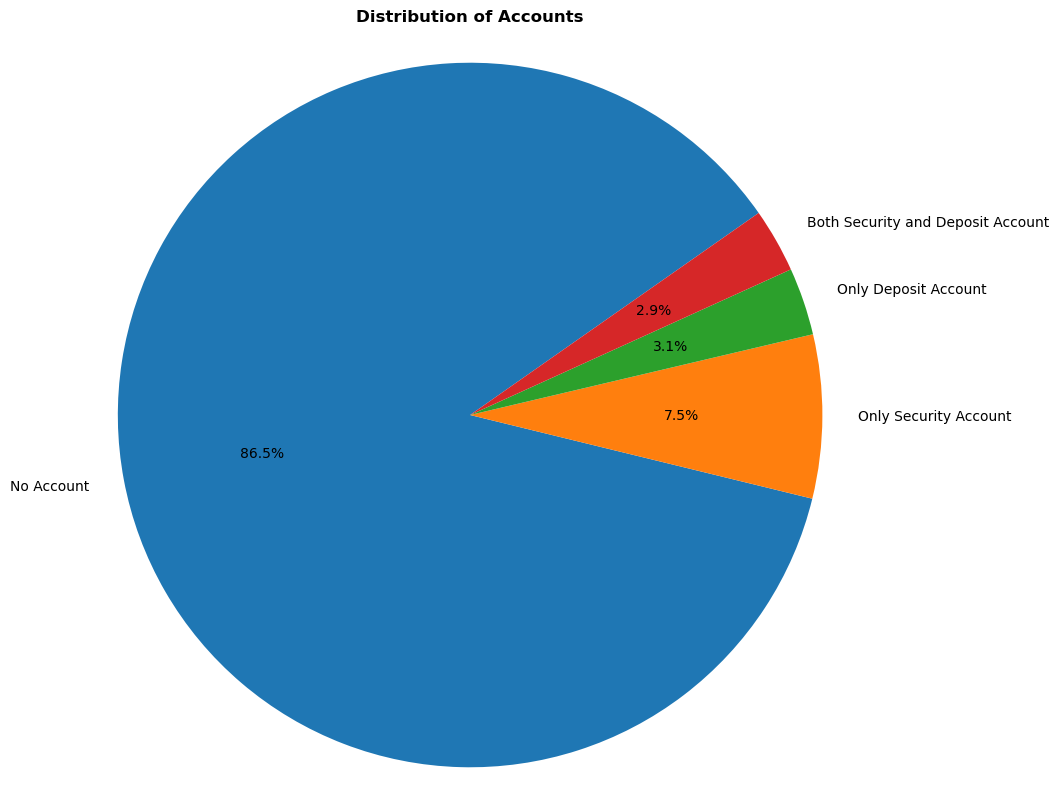

In [50]:
plt.figure(figsize = (10,10))
plt.pie(account_values, labels = account_values.index, autopct = '%1.1f%%', startangle = 35)
plt.axis('equal')
plt.title('Distribution of Accounts', fontweight = 'bold')

plt.show()

### Creating two separate boxplot visualizations based on the 'Personal Loan' column

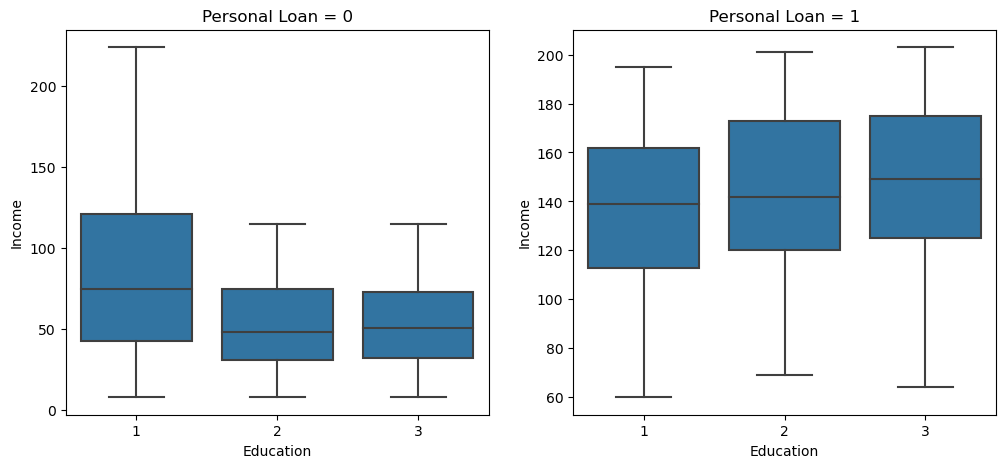

In [51]:
# Creating two separate boxplot visualizations based on 'Personal Loan'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First boxplot for 'Personal Loan' = 0
sns.boxplot(data=data[data['Personal Loan'] == 0], x='Education', y='Income', hue='Personal Loan', ax=axes[0])
axes[0].set_title("Personal Loan = 0")
axes[0].legend().set_visible(False)

# Second boxplot for 'Personal Loan' = 1
sns.boxplot(data=data[data['Personal Loan'] == 1], x='Education', y='Income', hue='Personal Loan', ax=axes[1])
axes[1].set_title("Personal Loan = 1")
axes[1].legend().set_visible(False)

# Show the plots
plt.show()

### Creating a Kernel Density Estimation (KDE) plot to visualize the distribution of income for two groups: individuals with no personal loan ('Personal Loan' equals 0) and individuals with a personal loan ('Personal Loan' equals 1)

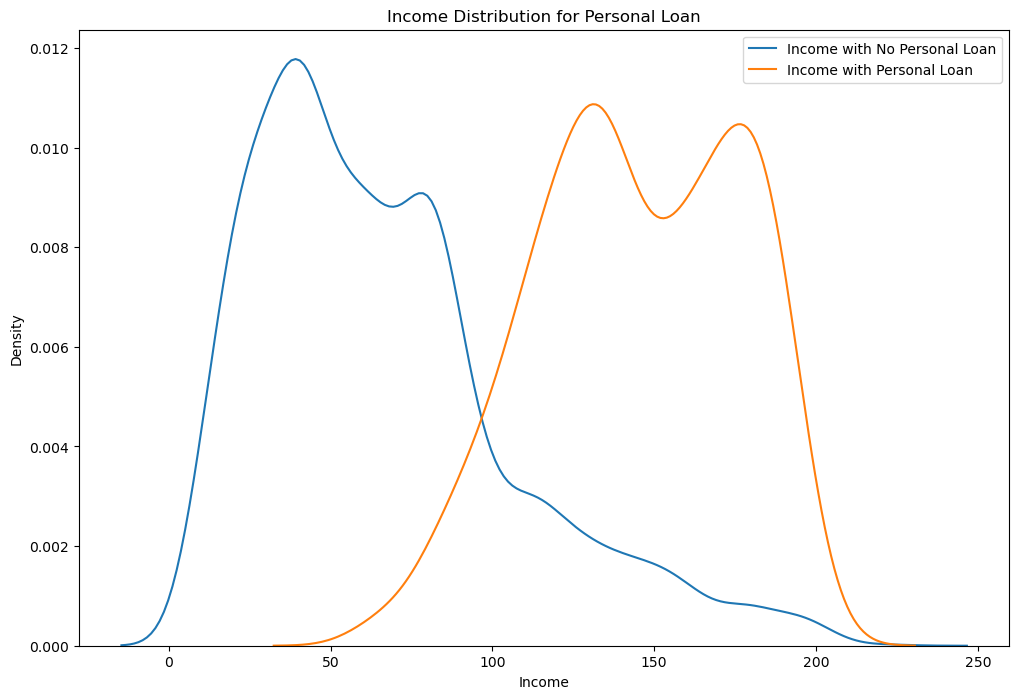

In [52]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data[data['Personal Loan'] == 0]['Income'] ,label='Income with No Personal Loan')
sns.kdeplot(data=data[data['Personal Loan'] == 1]['Income'] ,label='Income with Personal Loan')
plt.title("Income Distribution for Personal Loan")
plt.xlabel("Income")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Individuals with a Personal Loan typically exhibit a salary range spanning from a minimum of 50,000  to a maximum of 200,000. Among those who have opted for a Personal Loan, a noteworthy majority falls within the income bracket of 100,000 to 150,000, indicating a peak in loan applications within this salary range.

### Function is designed to create a Kernel Density Estimation (KDE) plot to visualize the distribution of a numerical variable (col1) in a dataset, separated by a binary categorical variable (col2) with two values (0 and 1)

In [54]:
def plot(col1, col2, label1, label2, title):
    plt.figure(figsize=(12, 8))
    
    sns.kdeplot(data=data[data[col2] == 0][col1], label=label1)
    sns.kdeplot(data=data[data[col2] == 1][col1], label=label2)
    
    plt.legend()
    plt.title(title)
    plt.xlabel(col1)
    plt.ylabel("Density")
    plt.show()

### Calling the plot function to create a KDE plot that visualizes the distribution of 'Income' based on the presence or absence of a 'Personal Loan' 

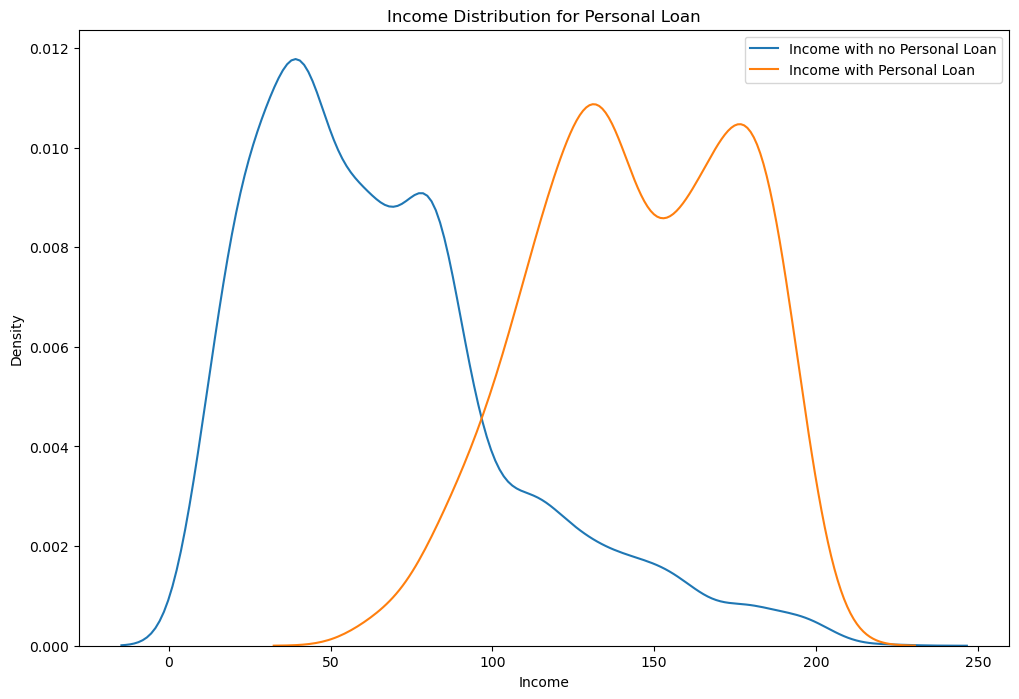

In [55]:
plot('Income', 'Personal Loan', 'Income with no Personal Loan', 'Income with Personal Loan', 'Income Distribution for Personal Loan')

###  Calling the plot function to create a KDE plot that visualizes the distribution of 'CCAvg' (Credit Card Average) based on the presence or absence of a 'Personal Loan.'

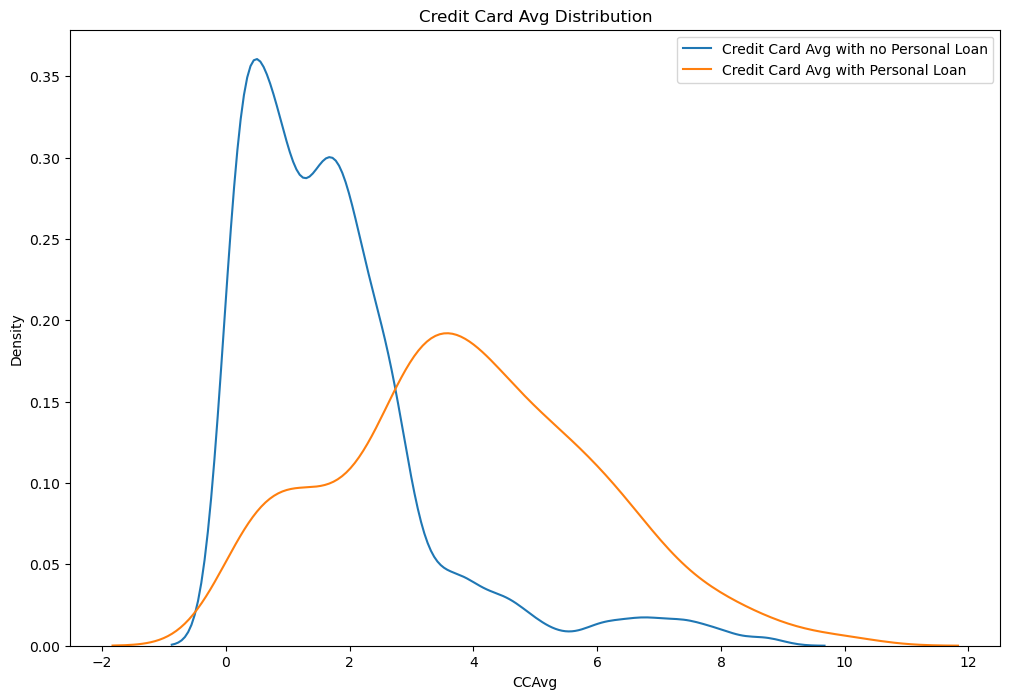

In [56]:
plot('CCAvg', 'Personal Loan', 
     'Credit Card Avg with no Personal Loan', 'Credit Card Avg with Personal Loan', 'Credit Card Avg Distribution')

### Defining a list called col containing four column names: 'Securities Account', 'Online', 'Account_Holder_Category', and 'CreditCard'

In [57]:
col = ['Securities Account', 'Online', 'Account_Holder_Category', 'CreditCard']

### Creating count plots for each of the columns listed in the col list, and you're visualizing how the counts vary with respect to the 'Personal Loan' column

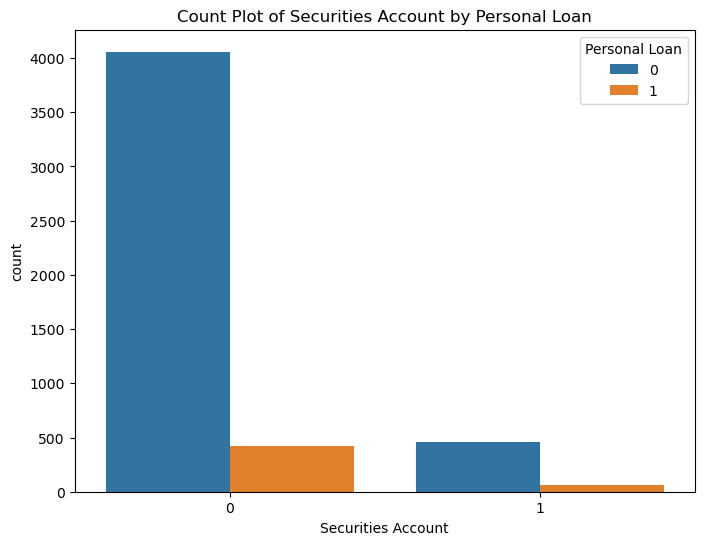

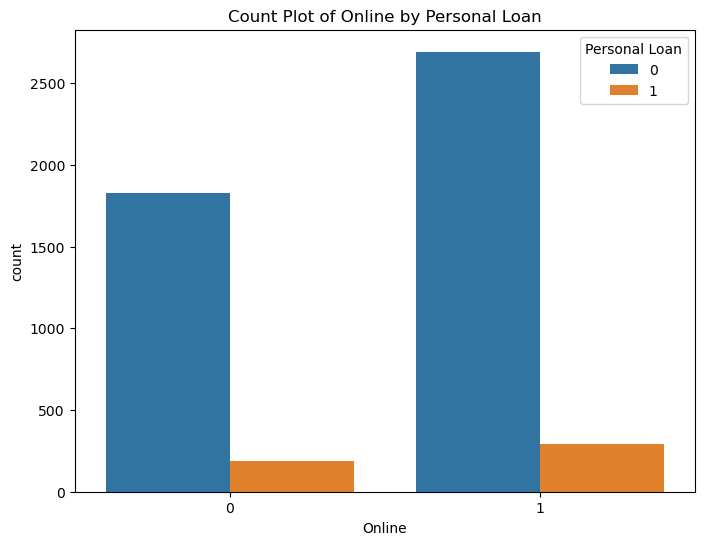

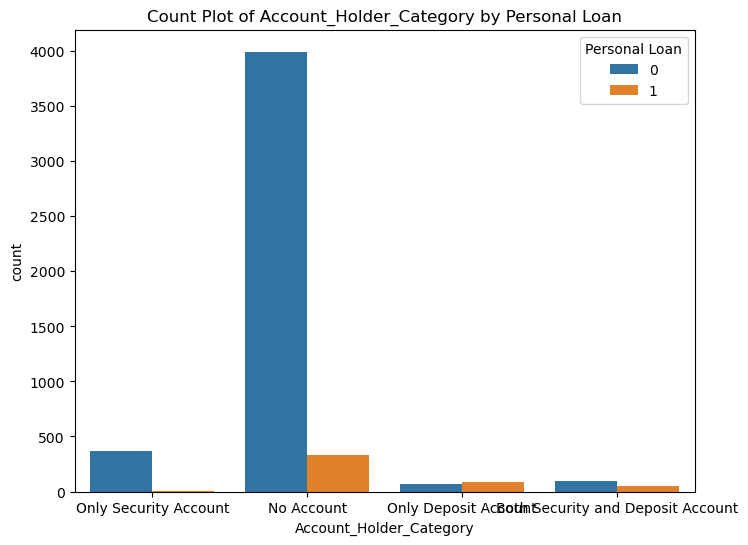

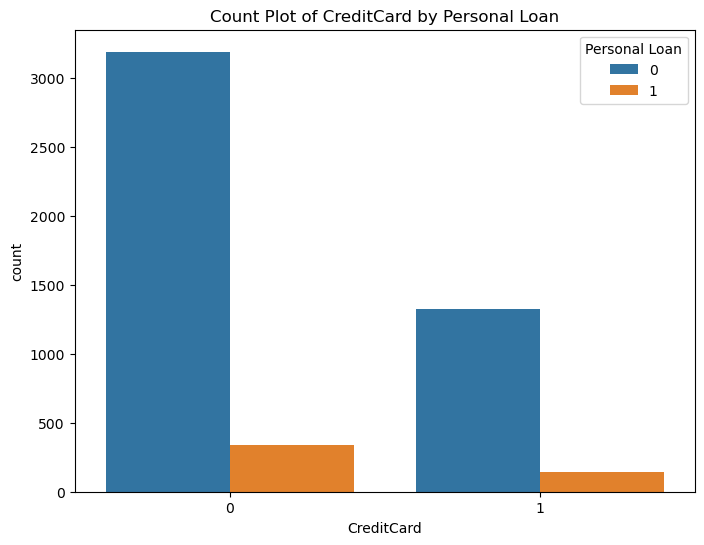

In [61]:
for i in col:
    plt.figure(figsize = (8, 6))
    sns.countplot(x = i, data = data, hue = 'Personal Loan')
    plt.title(f'Count Plot of {i} by Personal Loan')
    plt.show()